Assignment - 1 
1.  you have to take one dataset from kaggle from any where(web)
2.  train you custom word2vec model
3.  then decrease the dimension of vectors into 2 dimesion using PCA(dimesion reduction)
4.  then plot the data using graph(plot 2-d data)
5.  check the similarity between the words
6.  then send it to me inside th chat section keep your soltion over the github or drive and send the link in the community chat

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
conn = sqlite3.connect('kaggle/wikibooks.sqlite')  # if it's in the same folder as your script
## It is making the connection with the data base wikibooks.sqlite


In [6]:
cursor = conn.cursor()
## A cursor is like a controller or a pointer that lets you interact with the database — it helps you execute SQL commands

In [7]:
cursor.execute("SELECT * from en")
##This command is used to run SQL statements (like CREATE, INSERT, SELECT, etc.) on the database using the cursor you created.

In [8]:
raw_eng_text = cursor.fetchall()
## Assigning all the data fetched from the last SQL query to a variable named raw_eng_text.

In [9]:
cursor.execute(f"PRAGMA table_info(en);")
##This command is asking SQLite to tell you about the structure of the table named

In [10]:
column_names = cursor.fetchall()


In [11]:
column_names

[(0, 'title', 'TEXT', 0, None, 0),
 (1, 'url', 'TEXT', 0, None, 0),
 (2, 'abstract', 'TEXT', 0, None, 0),
 (3, 'body_text', 'TEXT', 0, None, 0),
 (4, 'body_html', 'TEXT', 0, None, 0)]

In [12]:
column_names = [column[1] for column in column_names]

In [13]:
column_names

['title', 'url', 'abstract', 'body_text', 'body_html']

In [14]:
# Create a pandas DataFrame from the fetched data
df_eng_text = pd.DataFrame(raw_eng_text, columns=column_names)

In [15]:
df_eng_text.body_text.str.len().max()

3517631

In [16]:
len(df_eng_text)

86736

In [17]:
df_eng_text.head()

,title,url,abstract,body_text,body_html
0,Wikibooks: Radiation Oncology/NHL/CLL-SLL,https://en.wikibooks.org/wiki/Radiation_Oncolo...,Chronic Lymphocytic Leukemia and Small Lymphoc...,Front Page: Radiation Oncology | RTOG Trials |...,"<div class=""mw-parser-output""><table width=""10..."
1,Wikibooks: Romanian/Lesson 9,https://en.wikibooks.org/wiki/Romanian/Lesson_9,==Băuturi/Beverages==,Băuturi/Beverages[edit | edit source]\nTea : C...,"<div class=""mw-parser-output""><h2><span id=""B...."
2,Wikibooks: Karrigell,https://en.wikibooks.org/wiki/Karrigell,Karrigell is an open Source Python web framewo...,Karrigell is an open Source Python web framewo...,"<div class=""mw-parser-output""><p>Karrigell is ..."
3,Wikibooks: The Pyrogenesis Engine/0 A.D./GuiSe...,https://en.wikibooks.org/wiki/The_Pyrogenesis_...,====setupUnitPanel====,setupUnitPanel[edit | edit source]\nHelper fun...,"<div class=""mw-parser-output""><h4><span class=..."
4,Wikibooks: LMIs in Control/pages/Exterior Coni...,https://en.wikibooks.org/wiki/LMIs_in_Control/...,== The Concept ==,Contents\n\n1 The Concept\n2 The System\n3 The...,"<div class=""mw-parser-output""><div id=""toc"" cl..."


In [18]:
sub_df = df_eng_text

In [19]:
## apply preprocessing function from gensim.utils
## The Basic job of simple preprocessing is to chnage the words to lower case, tokeniz the sentence, remove punchuation, Filter out words with less than 2 chra and more than 15 char
sub_df["body_text"]=sub_df["body_text"].apply(lambda x: simple_preprocess(x))

In [20]:
sub_df.head()

,title,url,abstract,body_text,body_html
0,Wikibooks: Radiation Oncology/NHL/CLL-SLL,https://en.wikibooks.org/wiki/Radiation_Oncolo...,Chronic Lymphocytic Leukemia and Small Lymphoc...,"[front, page, radiation, oncology, rtog, trial...","<div class=""mw-parser-output""><table width=""10..."
1,Wikibooks: Romanian/Lesson 9,https://en.wikibooks.org/wiki/Romanian/Lesson_9,==Băuturi/Beverages==,"[băuturi, beverages, edit, edit, source, tea, ...","<div class=""mw-parser-output""><h2><span id=""B...."
2,Wikibooks: Karrigell,https://en.wikibooks.org/wiki/Karrigell,Karrigell is an open Source Python web framewo...,"[karrigell, is, an, open, source, python, web,...","<div class=""mw-parser-output""><p>Karrigell is ..."
3,Wikibooks: The Pyrogenesis Engine/0 A.D./GuiSe...,https://en.wikibooks.org/wiki/The_Pyrogenesis_...,====setupUnitPanel====,"[setupunitpanel, edit, edit, source, helper, f...","<div class=""mw-parser-output""><h4><span class=..."
4,Wikibooks: LMIs in Control/pages/Exterior Coni...,https://en.wikibooks.org/wiki/LMIs_in_Control/...,== The Concept ==,"[contents, the, concept, the, system, the, dat...","<div class=""mw-parser-output""><div id=""toc"" cl..."


In [21]:
## train Word2Vec model using preprocessed data
model = Word2Vec(sub_df["body_text"])
"""
Before
[
  ["hello", "how", "are", "you"],
  ["this", "is", "a", "test"]
]
After
[
  [vec("hello"), vec("how"), vec("are"), vec("you")],
  [vec("this"), vec("is"), vec("a"), vec("test")]
]
"""

'\nBefore\n[\n  ["hello", "how", "are", "you"],\n  ["this", "is", "a", "test"]\n]\nAfter\n[\n  [vec("hello"), vec("how"), vec("are"), vec("you")],\n  [vec("this"), vec("is"), vec("a"), vec("test")]\n]\n'

In [22]:
model.wv["front"].shape

(100,)

## Get  the word from vector from model

In [23]:
words = list(model.wv.index_to_key) 
## It will create a single list for the whole word present in different rows

In [24]:
word_vectors = model.wv[words]
## It willl contain the vector with 100 D for each word in the similar way

## Apply PCA to reduce to 2D

In [25]:
pca = PCA(n_components=2)
word_vecs_2d = pca.fit_transform(word_vectors)
##Here We are creating the object for PCA and finally converting the 100 D to 2 D

## Plot the vectors



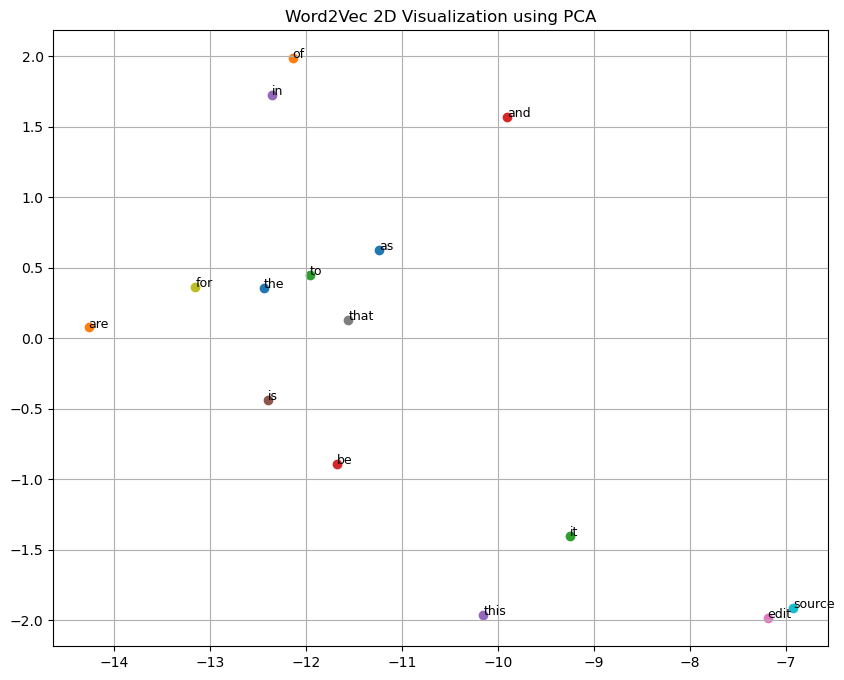

In [30]:
## So all the plotting commands after this will use this figure size 10 X 8
plt.figure(figsize=(10, 8))

'''
For each word present in the list , 
1st line, this for loop will go word by word
2nd line, for the word present at index 0 and so, it will first create a x and y for that index which is coming from word_vecs_2
3rd line , it will plot the word in 2d graph
4th line , it will give the exact word for that point
'''
for i, word in enumerate(words[:15]):
    x, y = word_vecs_2d[i]
    plt.scatter(x, y)
    plt.annotate(word, (x, y), fontsize=9)

plt.title("Word2Vec 2D Visualization using PCA")
plt.grid(True)
plt.show()


In [31]:
model.wv.most_similar("source")

[('edit', 0.6817672252655029),
 ('references', 0.6199760437011719),
 ('summary', 0.5192493796348572),
 ('footnotes', 0.5040265917778015),
 ('description', 0.4777454733848572),
 ('notes', 0.45444348454475403),
 ('overview', 0.4366229474544525),
 ('acknowledgments', 0.43008705973625183),
 ('barendregt', 0.42464885115623474),
 ('basic', 0.41885608434677124)]

In [29]:
model.wv.most_similar("first")

[('second', 0.8642998337745667),
 ('last', 0.8285740613937378),
 ('third', 0.7509198188781738),
 ('fourth', 0.7360485792160034),
 ('next', 0.7030492424964905),
 ('final', 0.6641017198562622),
 ('fifth', 0.6561377048492432),
 ('finally', 0.6353775858879089),
 ('the', 0.6264860033988953),
 ('this', 0.6206513047218323)]